In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from warnings import filterwarnings
filterwarnings("ignore")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import silhouette_samples
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Read the dataset (tab, csv, xls, txt, inbuilt dataset)

In [2]:
feed= pd.read_csv("student_evaluation_reduced (1).csv")
feed.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,8,1,0,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
1,3,8,1,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,3,13,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,3,5,1,0,1,1,1,1,1,1,1,1,2,3,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,3,3,1,3,4,2,2,4,2,3,3,3,2,3,3,3,4,4,4,4,3,4,4,4,4,3,4,3,3,3,3,2,4


# Summarize important observations from the data set

In [3]:
feed.shape

(500, 33)

In [4]:
feed.dtypes

instr         int64
class         int64
nb.repeat     int64
attendance    int64
difficulty    int64
Q1            int64
Q2            int64
Q3            int64
Q4            int64
Q5            int64
Q6            int64
Q7            int64
Q8            int64
Q9            int64
Q10           int64
Q11           int64
Q12           int64
Q13           int64
Q14           int64
Q15           int64
Q16           int64
Q17           int64
Q18           int64
Q19           int64
Q20           int64
Q21           int64
Q22           int64
Q23           int64
Q24           int64
Q25           int64
Q26           int64
Q27           int64
Q28           int64
dtype: object

In [5]:
feed.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

All variable data type is int mean numeric 

In [6]:
feed.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.532000,7.374000,1.214000,1.530000,2.742000,2.98000,3.134000,3.222000,3.124000,3.14400,3.160000,3.102000,3.062000,3.190000,3.164000,3.204000,3.062000,3.286000,3.344000,3.322000,3.212000,3.414000,3.236000,3.344000,3.344000,3.362000,3.360000,3.208000,3.182000,3.348000,3.266000,3.184000,3.384000
std,0.694219,3.765432,0.533642,1.487793,1.359092,1.37964,1.314344,1.300808,1.344708,1.32165,1.315241,1.332346,1.346768,1.299722,1.296327,1.334896,1.318192,1.306759,1.290346,1.299883,1.341139,1.307679,1.315966,1.307319,1.318005,1.297043,1.302995,1.313082,1.344802,1.316953,1.295608,1.352702,1.329692
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.00000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000
75%,3.000000,11.000000,1.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
for i in feed.columns:
    print(i,feed[i].unique())

instr [3 2 1]
class [ 8 13  5  3  6 11 10  7  1  9  4  2 12]
nb.repeat [1 3 2]
attendance [0 4 3 2 1]
difficulty [1 3 4 2 5]
Q1 [5 3 1 2 4]
Q2 [5 3 1 2 4]
Q3 [5 3 1 4 2]
Q4 [5 3 1 2 4]
Q5 [5 3 1 4 2]
Q6 [5 3 1 4 2]
Q7 [5 3 1 4 2]
Q8 [5 3 2 4 1]
Q9 [5 3 4 2 1]
Q10 [5 3 4 2 1]
Q11 [5 3 1 4 2]
Q12 [5 3 1 4 2]
Q13 [5 3 1 4 2]
Q14 [5 3 1 4 2]
Q15 [5 3 1 4 2]
Q16 [5 3 1 4 2]
Q17 [5 3 1 4 2]
Q18 [5 3 1 4 2]
Q19 [5 3 1 4 2]
Q20 [5 3 1 4 2]
Q21 [5 3 1 4 2]
Q22 [5 3 1 4 2]
Q23 [5 3 1 4 2]
Q24 [5 3 1 4 2]
Q25 [5 3 1 4 2]
Q26 [5 3 1 4 2]
Q27 [5 3 1 2 4]
Q28 [5 3 1 4 2]


In [8]:
feed["class"].unique()

array([ 8, 13,  5,  3,  6, 11, 10,  7,  1,  9,  4,  2, 12], dtype=int64)

In [9]:
feed.cov()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
instr,0.481940,-0.061090,0.028208,-0.122204,-0.062870,-0.163687,-0.139567,-0.112329,-0.142253,-0.144898,-0.127375,-0.136537,-0.157299,-0.143367,-0.123495,-0.136802,-0.155295,-0.106365,-0.077162,-0.099503,-0.149082,-0.066381,-0.133820,-0.095198,-0.071150,-0.072729,-0.075671,-0.128914,-0.151126,-0.103343,-0.127768,-0.130148,-0.104497
class,-0.061090,14.178481,0.162289,-0.318858,-0.161832,-0.363246,-0.447010,-0.323675,-0.359094,-0.422701,-0.358557,-0.326802,-0.281752,-0.147355,-0.348032,-0.182661,-0.412012,-0.481928,-0.319295,-0.254938,-0.265820,-0.269375,-0.164593,-0.205066,-0.315287,-0.310008,-0.249138,-0.182156,-0.300669,-0.282717,-0.338160,-0.217251,-0.420457
nb.repeat,0.028208,0.162289,0.284774,-0.019459,0.151515,-0.067856,-0.058794,-0.043595,-0.058653,-0.052922,-0.050341,-0.071972,-0.047363,-0.068798,-0.053202,-0.031719,-0.029327,-0.057319,-0.063743,-0.071050,-0.053475,-0.046689,-0.052609,-0.059735,-0.053723,-0.071611,-0.067174,-0.056625,-0.053054,-0.058589,-0.036998,-0.049475,-0.054285
attendance,-0.122204,-0.318858,-0.019459,2.213527,0.922585,0.026653,0.121222,0.238818,0.190661,0.174028,0.203607,0.154248,0.103347,0.239780,0.181443,0.252385,0.155451,0.256934,0.292265,0.265872,0.137916,0.391363,0.181283,0.270220,0.306293,0.324790,0.309820,0.196152,0.153848,0.292144,0.241503,0.174830,0.315110
difficulty,-0.062870,-0.161832,0.151515,0.922585,1.847130,-0.059279,-0.067563,-0.012749,-0.066140,-0.048946,-0.030782,-0.035756,-0.082168,0.001022,-0.077844,-0.019407,-0.036076,0.023836,0.040834,0.051178,-0.043391,0.123058,-0.037186,0.008770,0.070894,0.039475,0.026934,-0.008353,-0.037118,0.049884,0.040709,-0.004537,0.067206
Q1,-0.163687,-0.363246,-0.067856,0.026653,-0.059279,1.903407,1.515711,1.325090,1.583647,1.479840,1.422044,1.470982,1.484208,1.364529,1.422124,1.338758,1.462164,1.284289,1.233347,1.281002,1.360962,1.144569,1.283287,1.241363,1.253387,1.241723,1.235671,1.348858,1.370381,1.247455,1.203727,1.370421,1.220120
Q2,-0.139567,-0.447010,-0.058794,0.121222,-0.067563,1.515711,1.727499,1.451154,1.558501,1.551808,1.473507,1.505343,1.456605,1.389319,1.456938,1.403471,1.444581,1.414505,1.384673,1.431715,1.486565,1.311146,1.409194,1.380665,1.384673,1.372236,1.366493,1.449026,1.452517,1.376120,1.345046,1.436216,1.345234
Q3,-0.112329,-0.323675,-0.043595,0.238818,-0.012749,1.325090,1.451154,1.692100,1.431335,1.527086,1.419319,1.416188,1.411058,1.366553,1.418429,1.389491,1.378994,1.445399,1.424481,1.437391,1.429796,1.376846,1.438485,1.420473,1.452537,1.406449,1.400882,1.428681,1.426449,1.433611,1.399747,1.407968,1.387527
Q4,-0.142253,-0.359094,-0.058653,0.190661,-0.066140,1.583647,1.558501,1.431335,1.808240,1.555255,1.495150,1.488329,1.485283,1.419279,1.444553,1.429563,1.437186,1.371279,1.374092,1.422918,1.464641,1.307279,1.365467,1.374092,1.372088,1.355824,1.358076,1.429066,1.422277,1.373595,1.329675,1.424032,1.351086
Q5,-0.144898,-0.422701,-0.052922,0.174028,-0.048946,1.479840,1.551808,1.527086,1.555255,1.746758,1.596152,1.580473,1.562196,1.475591,1.543471,1.463551,1.490052,1.517852,1.483431,1.496625,1.580633,1.367118,1.482982,1.437339,1.441347,1.388649,1.394950,1.497042,1.514822,1.414717,1.424545,1.496497,1.393491


In [10]:
feed.corr()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
instr,1.000000,-0.023370,0.076143,-0.118317,-0.066634,-0.170904,-0.152960,-0.124389,-0.152383,-0.157924,-0.139502,-0.147617,-0.168242,-0.158892,-0.137227,-0.147621,-0.169700,-0.117248,-0.086140,-0.110264,-0.160124,-0.073121,-0.146480,-0.104894,-0.077761,-0.080772,-0.083655,-0.141420,-0.161877,-0.113035,-0.142053,-0.138593,-0.113203
class,-0.023370,1.000000,0.080765,-0.056917,-0.031623,-0.069923,-0.090322,-0.066082,-0.070919,-0.084938,-0.072400,-0.065141,-0.055560,-0.030109,-0.071300,-0.036340,-0.083007,-0.097943,-0.065716,-0.052085,-0.052638,-0.054707,-0.033216,-0.041658,-0.063529,-0.063475,-0.050779,-0.036842,-0.059377,-0.057012,-0.069316,-0.042652,-0.083976
nb.repeat,0.076143,0.080765,1.000000,-0.024509,0.208909,-0.092166,-0.083825,-0.062802,-0.081736,-0.075036,-0.071724,-0.101227,-0.065901,-0.099191,-0.076907,-0.044527,-0.041690,-0.082196,-0.092572,-0.102426,-0.074718,-0.066906,-0.074915,-0.085625,-0.076383,-0.103461,-0.096608,-0.080811,-0.073928,-0.083368,-0.053512,-0.068538,-0.076502
attendance,-0.118317,-0.056917,-0.024509,1.000000,0.456263,0.012985,0.061991,0.123399,0.095300,0.088504,0.104051,0.077815,0.051578,0.123999,0.094077,0.127079,0.079263,0.132155,0.152240,0.137476,0.069119,0.201157,0.092591,0.138929,0.156199,0.168308,0.159817,0.100406,0.076894,0.149102,0.125287,0.086870,0.159283
difficulty,-0.066634,-0.031623,0.208909,0.456263,1.000000,-0.031614,-0.037823,-0.007212,-0.036190,-0.027249,-0.017220,-0.019746,-0.044891,0.000579,-0.044183,-0.010697,-0.020137,0.013421,0.023284,0.028969,-0.023805,0.069241,-0.020792,0.004936,0.039577,0.022393,0.015209,-0.004680,-0.020309,0.027870,0.023119,-0.002468,0.037189
Q1,-0.170904,-0.069923,-0.092166,0.012985,-0.031614,1.000000,0.835876,0.738357,0.853620,0.811582,0.783685,0.800248,0.798797,0.760968,0.795165,0.726923,0.803992,0.712363,0.692808,0.714299,0.735540,0.634417,0.706827,0.688258,0.689290,0.693912,0.687376,0.744575,0.738613,0.686576,0.673424,0.734321,0.665098
Q2,-0.152960,-0.090322,-0.083825,0.061991,-0.037823,0.835876,1.000000,0.848773,0.881800,0.893332,0.852389,0.859626,0.822887,0.813284,0.855101,0.799921,0.833785,0.823569,0.816455,0.837999,0.843337,0.762853,0.814737,0.803523,0.799321,0.804944,0.797913,0.839606,0.821777,0.795019,0.789868,0.807809,0.769729
Q3,-0.124389,-0.066082,-0.062802,0.123399,-0.007212,0.738357,0.848773,1.000000,0.818276,0.888248,0.829586,0.817130,0.805451,0.808282,0.841162,0.800194,0.804212,0.850314,0.848667,0.850076,0.819572,0.809415,0.840325,0.835292,0.847222,0.833598,0.826505,0.836432,0.815426,0.836851,0.830544,0.800161,0.802190
Q4,-0.152383,-0.070919,-0.081736,0.095300,-0.036190,0.853620,0.881800,0.818276,1.000000,0.875099,0.845379,0.830718,0.820140,0.812061,0.828687,0.796394,0.810786,0.780373,0.791920,0.814043,0.812137,0.743428,0.771629,0.781639,0.774171,0.777357,0.775092,0.809343,0.786498,0.775640,0.763209,0.782870,0.755621
Q5,-0.157924,-0.084938,-0.075036,0.088504,-0.027249,0.811582,0.893332,0.888248,0.875099,1.000000,0.918232,0.897540,0.877661,0.859012,0.900881,0.829553,0.855276,0.878856,0.869851,0.871149,0.891746,0.791022,0.852658,0.831881,0.827437,0.810069,0.810027,0.862633,0.852289,0.812799,0.831929,0.837061,0.792934


# Create Visualization plots to find the pattern amongst the variables. 

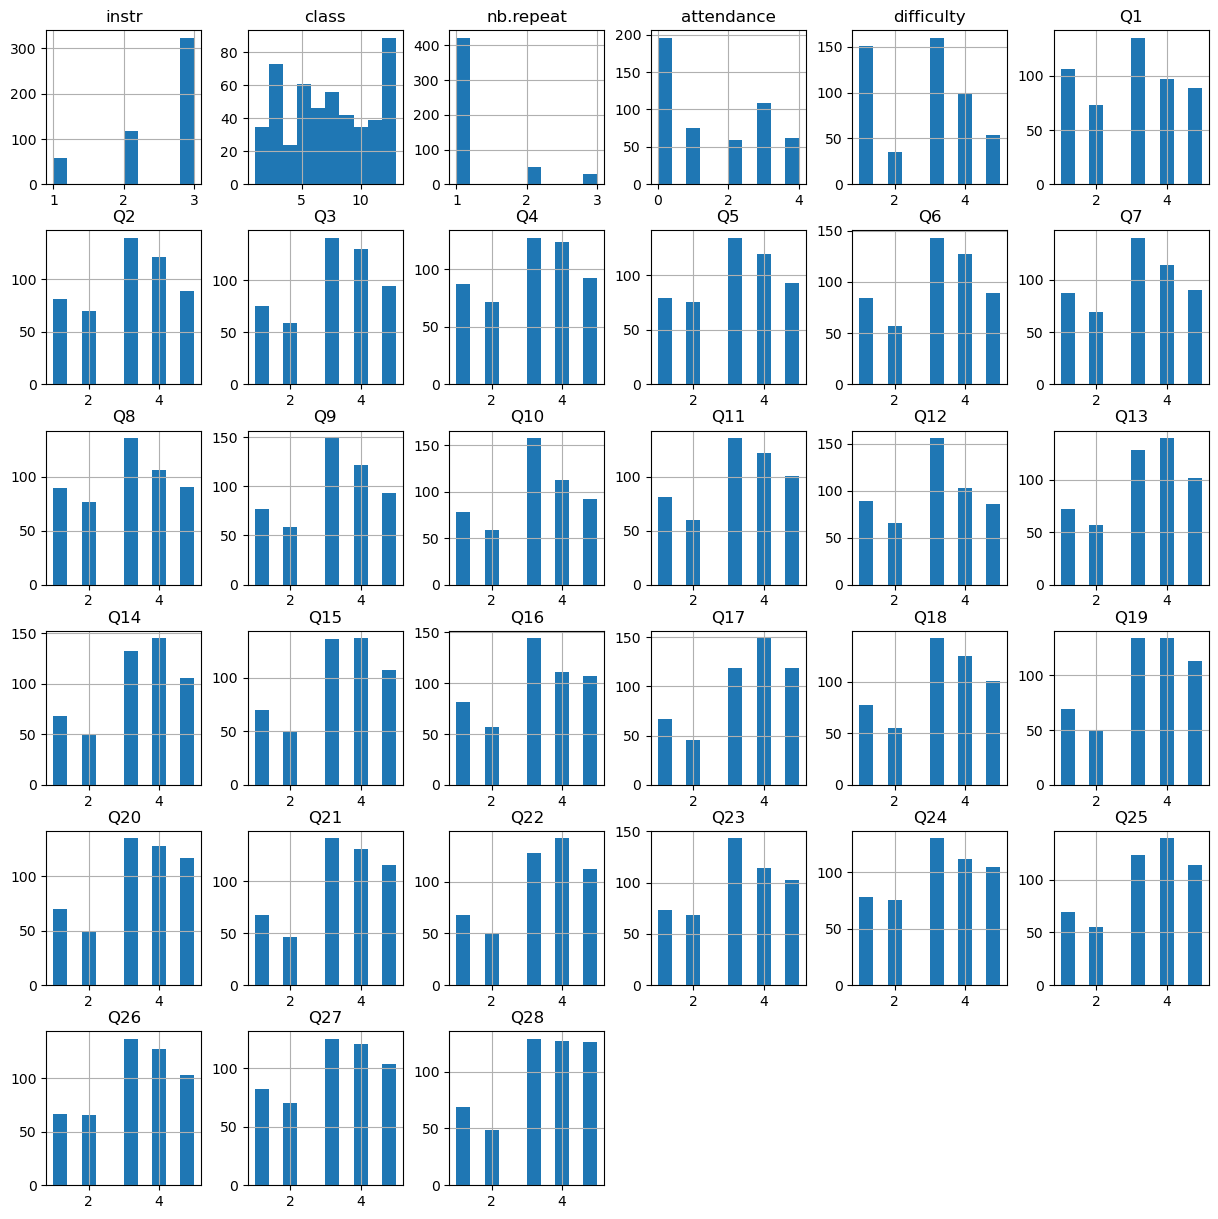

In [11]:
feed.hist(figsize=(15,15));

<Axes: >

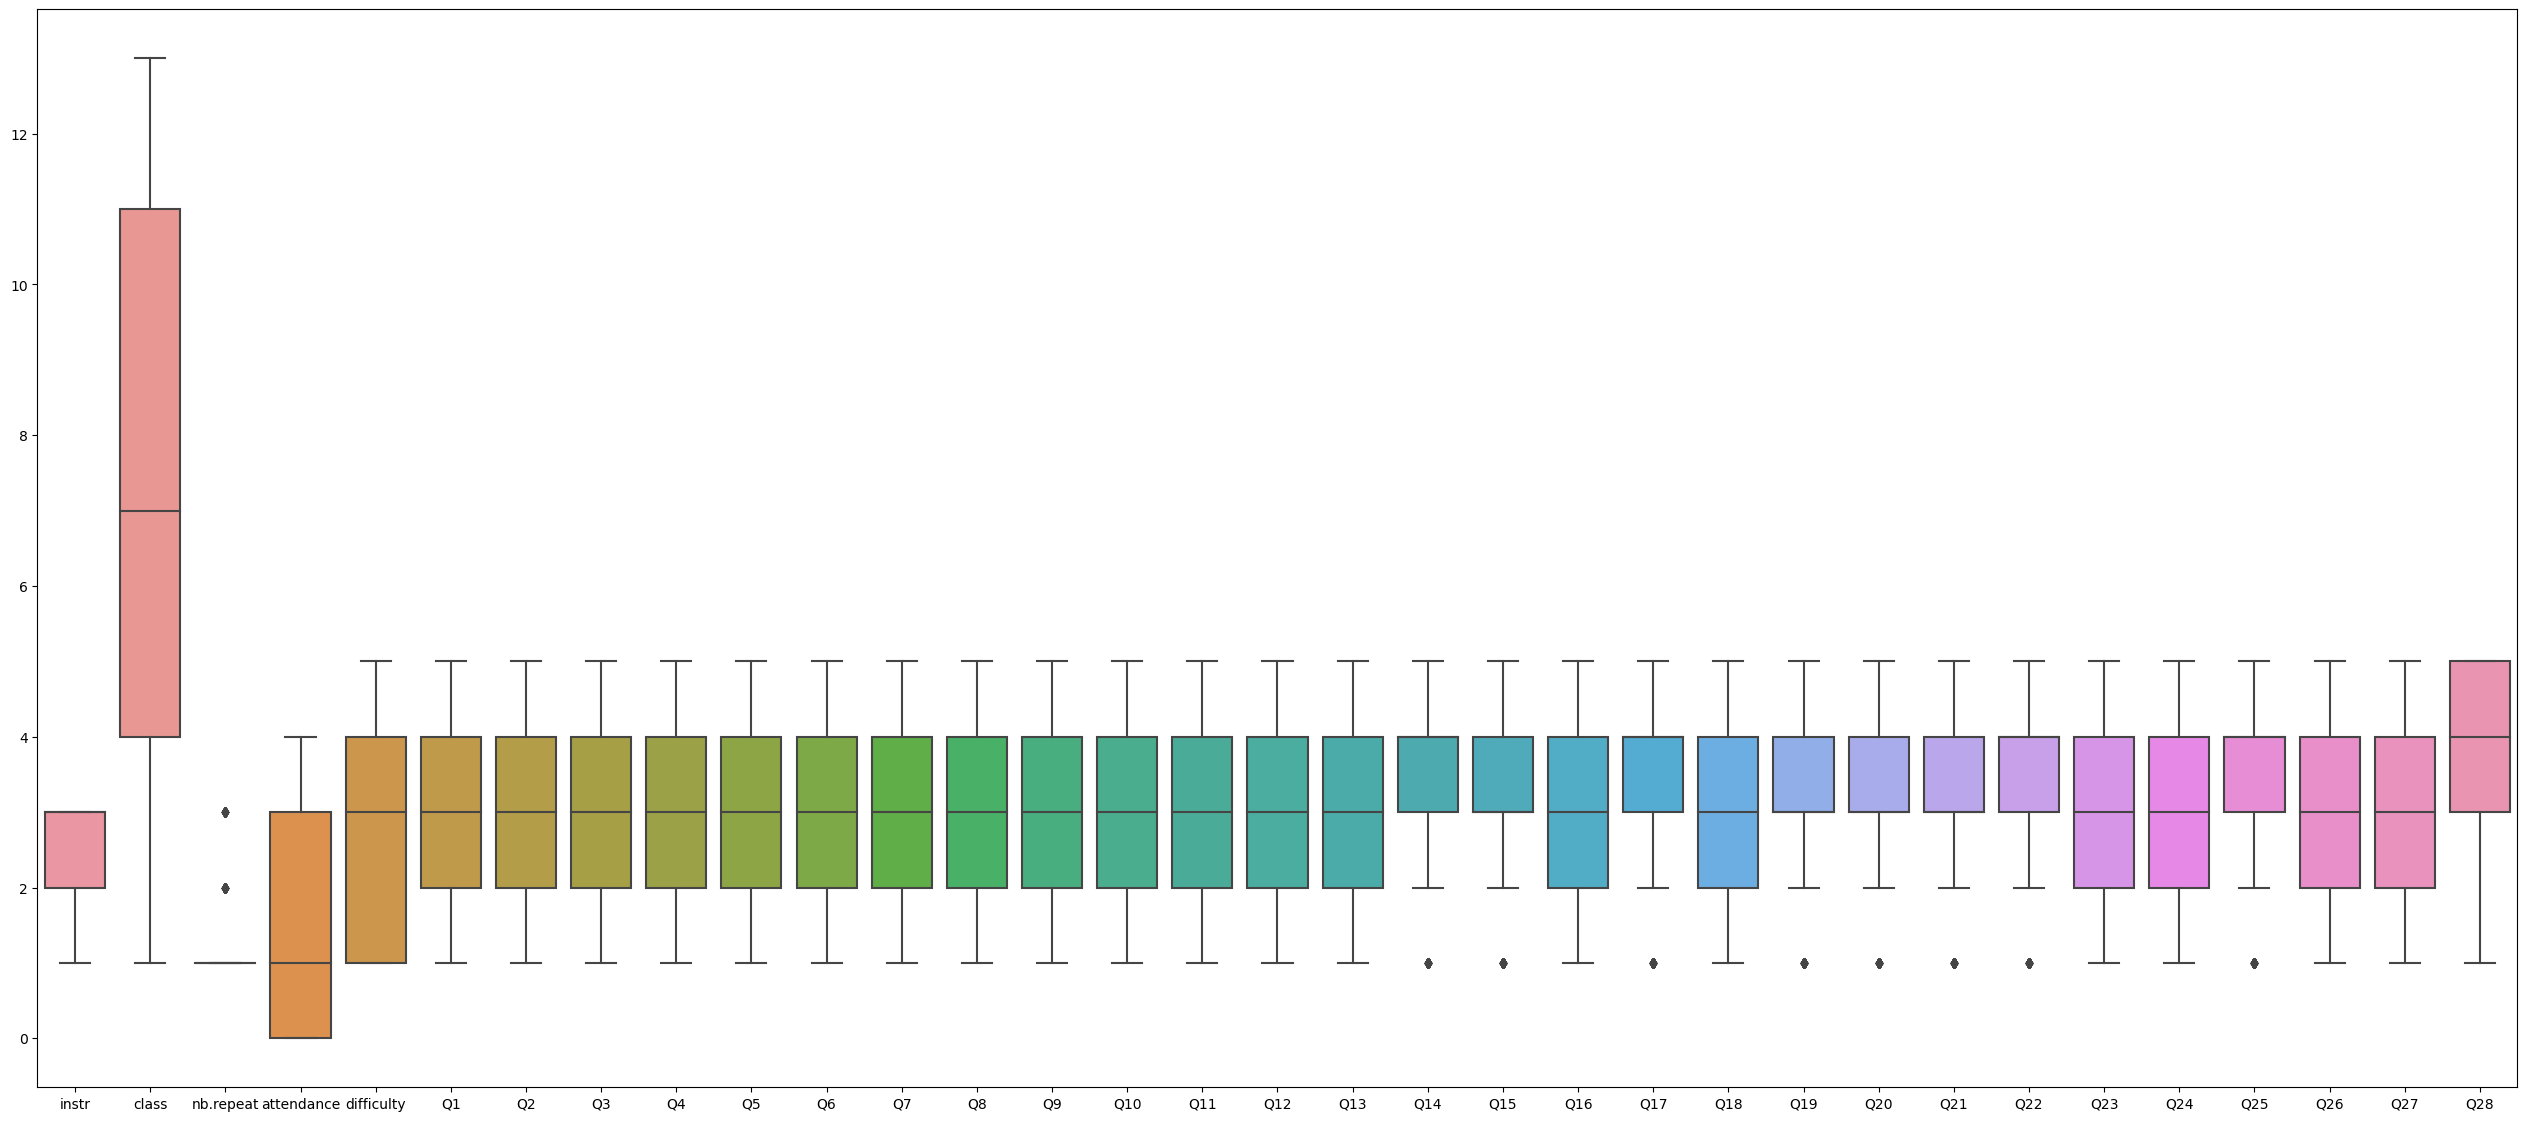

In [12]:
plt.figure(figsize=(32,14))
sns.boxplot(feed)

# Finding optimal number of cluster

In [13]:
wcss=[]
for k in range(1,8):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(feed)
    
    wcss.append(kmeans.inertia_)
print(wcss)

[33814.528, 20304.479786532924, 15797.337462895228, 13316.733159998428, 11617.98250052787, 10244.155123500908, 9502.731769957918]


The above output shows the within cluster sum of squares (WCSS) for different values of K. We can see that the WCSS is decreasing with the increase in K.

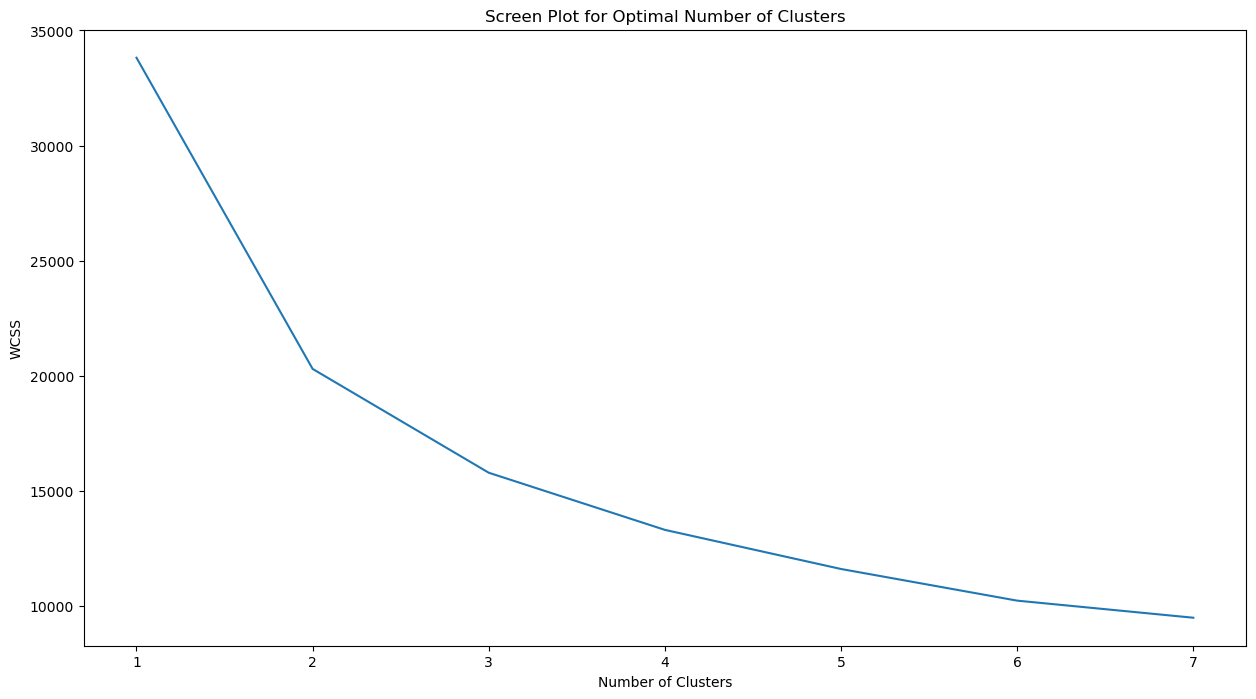

In [14]:
plt.figure(figsize=(15,8))

plt.plot(range(1,8), wcss) 

plt.xlabel("Number of Clusters")
plt.title('Screen Plot for Optimal Number of Clusters')
plt.ylabel("WCSS")


plt.show()

K=3 is the optimal number.wcss is decreasing slowly after k=3.

# Check if the optimal cluster size is correct 

In [15]:

silhouette_coefficients = []


for k in range(2,8):
    
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(feed)
    
    score = silhouette_score(feed,kmeans.labels_, random_state=10)

    silhouette_coefficients.append(score)
    
print(silhouette_coefficients)

[0.315890912577883, 0.2651328764320549, 0.2609325227488109, 0.25140259415674676, 0.25320741803719277, 0.24241335185492363]


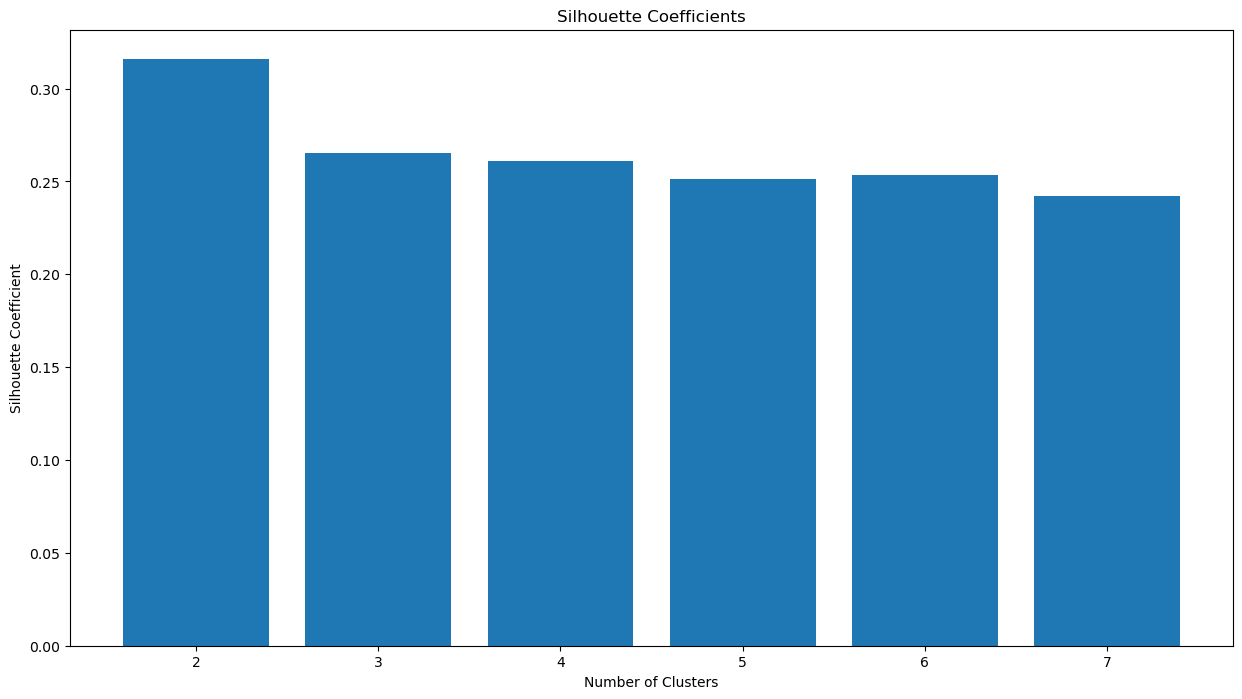

In [16]:
plt.figure(figsize=(15,8))

plt.bar(range(2,8), silhouette_coefficients)

plt.title('Silhouette Coefficients')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")

plt.show()

From here I can say the correct K is 2.

# Apply Clustering and Generate Visualization

In [17]:
Q1 = feed.quantile(0.25)

Q3 = feed.quantile(0.75)

IQR = Q3 - Q1

feed = feed[~((feed < (Q1 - 1.5 * IQR)) | (feed > (Q3 + 1.5 * IQR))).any(axis=1)]

feed = feed.reset_index(drop = True)

In [18]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_feed=ss.fit_transform(feed)

In [19]:
feed_ss=pd.DataFrame(scaled_feed,columns=feed.columns)
feed_ss.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,0.718594,0.237541,0.0,-1.099849,-1.235488,1.365722,1.368469,1.315587,1.330500,1.343544,1.350930,1.359394,1.360871,1.364472,1.370443,1.314707,1.435062,1.300608,1.296974,1.284811,1.320875,1.226516,1.324606,1.261444,1.254013,1.260218,1.254548,1.325448,1.310941,1.233944,1.321683,1.279535,1.177781
1,0.718594,0.237541,0.0,1.560774,0.279532,-0.286173,-0.482222,-0.571417,-0.468843,-0.508721,-0.515141,-0.482533,-0.392702,-0.546327,-0.544940,-0.526402,-0.400783,-0.724462,-0.824803,-0.817069,-0.604836,-0.887141,-0.651172,-0.792742,-0.788072,-0.835226,-0.836366,-0.587292,-0.550595,-0.789382,-0.662239,-0.578277,-0.776015
2,0.718594,1.593279,0.0,0.895618,0.279532,-0.286173,-0.482222,-0.571417,-0.468843,-0.508721,-0.515141,-0.482533,-0.392702,-0.546327,-0.544940,-0.526402,-0.400783,-0.724462,-0.824803,-0.817069,-0.604836,-0.887141,-0.651172,-0.792742,-0.788072,-0.835226,-0.836366,-0.587292,-0.550595,-0.789382,-0.662239,-0.578277,-0.776015
3,0.718594,-1.118198,0.0,0.895618,1.037042,-1.112121,-1.407568,0.372085,-1.368515,-0.508721,-0.515141,-0.482533,-1.269488,-0.546327,-0.544940,-0.526402,0.517140,0.288073,0.236085,0.233871,-0.604836,0.169688,0.336717,0.234351,0.232970,-0.835226,0.209091,-0.587292,-0.550595,-0.789382,-0.662239,-1.507182,0.200883
4,-0.690803,-0.304755,0.0,0.230462,-0.477978,0.539774,0.443123,0.372085,0.430829,0.417412,0.417895,0.438430,0.484085,0.409072,0.412751,0.394153,0.517140,0.288073,0.236085,0.233871,0.358020,0.169688,0.336717,0.234351,0.232970,0.212496,0.209091,0.369078,0.380173,0.222281,0.329722,0.350629,0.200883


In [20]:
cluster_range=range(1,11)
cluster_errors=[]

for k in cluster_range:
    cluster=KMeans(k,n_init=15,random_state=1)
    cluster.fit(feed_ss)
    labels=cluster.labels_
    centroids=cluster.cluster_centers_
    cluster_errors.append(cluster.inertia_) #wcss is the inertia
cluster_df=pd.DataFrame({"num_cluster":cluster_range,"cluster_error":cluster_errors})
cluster_df
    

,num_cluster,cluster_error
0,1,11360.000000
1,2,6013.659037
2,3,4722.397749
3,4,4078.986521
4,5,3805.886441
5,6,3607.247999
6,7,3477.658132
7,8,3342.132176
8,9,3226.271281
9,10,3182.943108


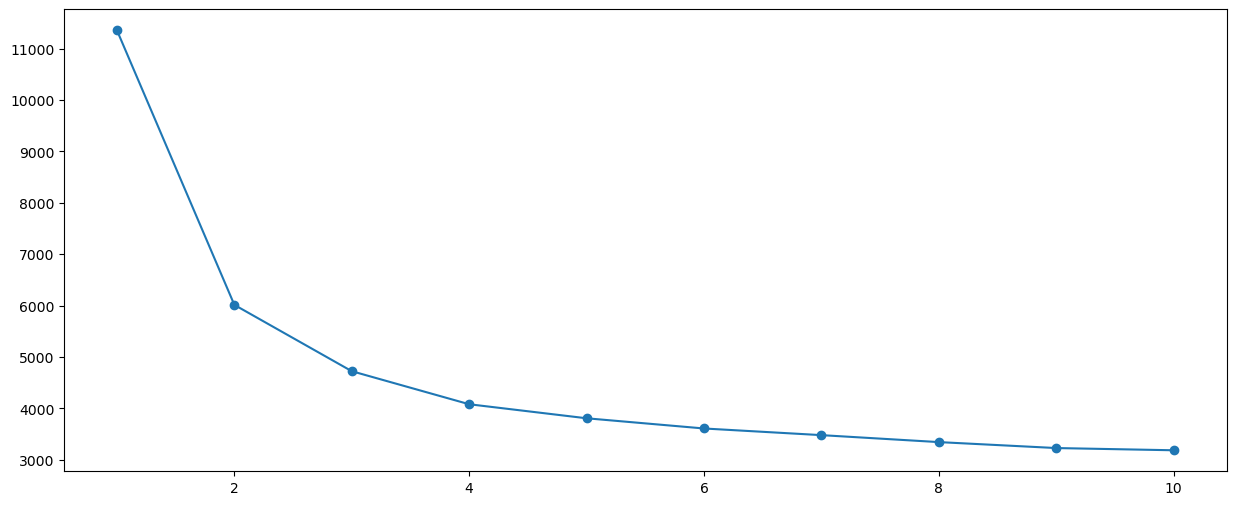

In [21]:
plt.figure(figsize=(15,6))
plt.plot(cluster_df.num_cluster,cluster_df.cluster_error,marker="o");

In [22]:
n_clusters=[2,3,4,5]
for k in n_clusters:
    cluster=KMeans(n_clusters=k,random_state=5)
    predict=cluster.fit_predict(feed_ss)
    score=silhouette_score(feed_ss,predict,random_state=5)
    print("For {} clusters the silhouette is {}".format(k,score))

For 2 clusters the silhouette is 0.3815854637937597
For 3 clusters the silhouette is 0.31166033303485674
For 4 clusters the silhouette is 0.30288365587176136
For 5 clusters the silhouette is 0.29641708995640115


In [23]:
pip install yellowbrick

In [26]:
from yellowbrick.cluster import SilhouetteVisualizer

In [27]:
from sklearn.metrics import silhouette_score

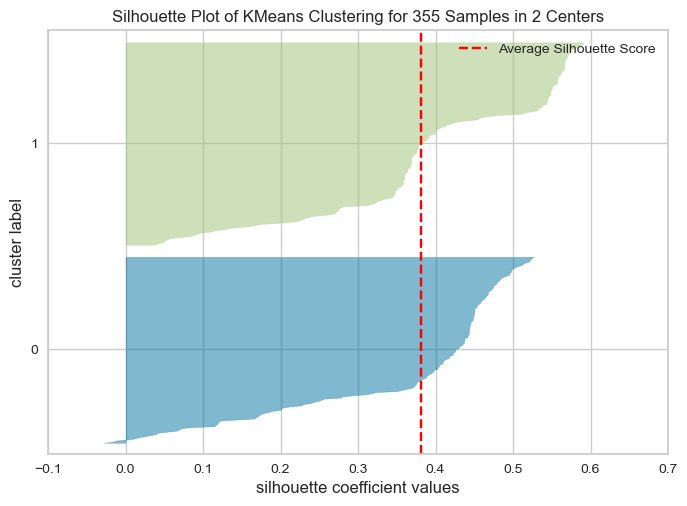

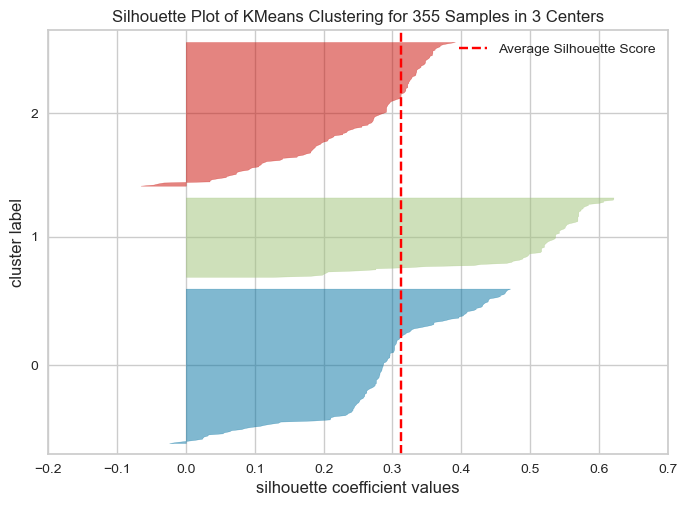

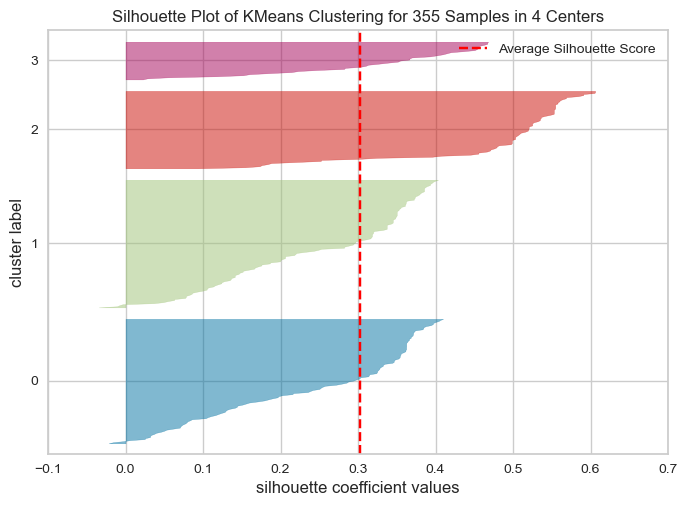

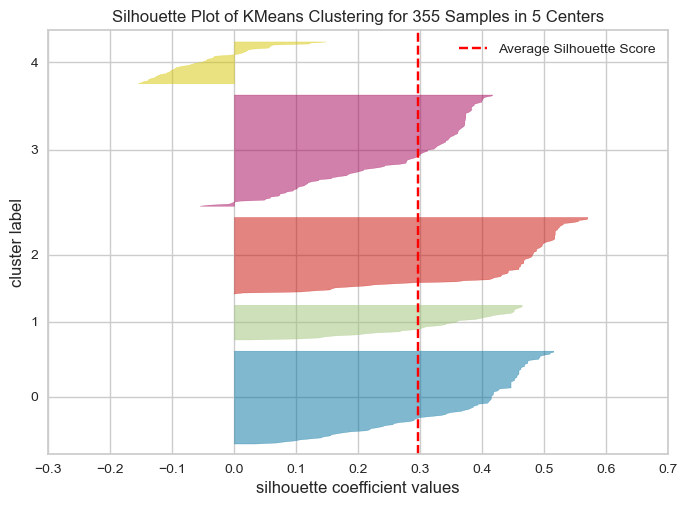

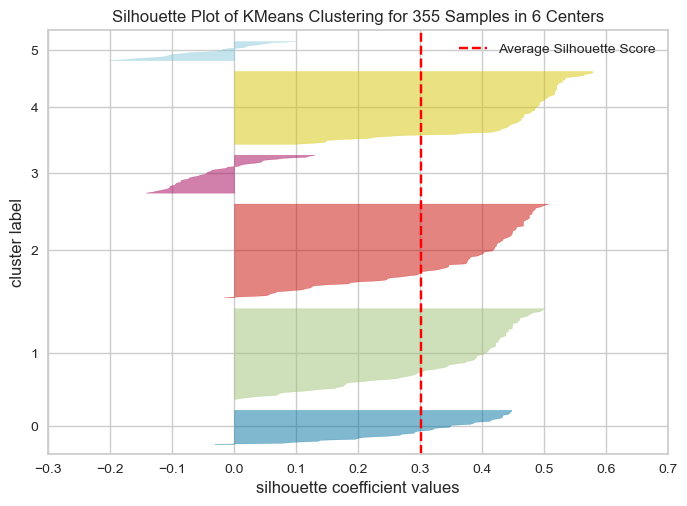

In [28]:
for i in range(2,7):
    kms=KMeans(n_clusters=i)
    kms.fit(feed_ss)
    model=KMeans(n_clusters=i,random_state=40)
    visualizer=SilhouetteVisualizer(model,colors="yellowbrick")
    visualizer.fit(feed_ss)
    visualizer.show()

In [29]:
kmeans=KMeans(n_clusters=2,n_init=15,random_state=2)
kmeans.fit(feed_ss)

KMeans(n_clusters=2, n_init=15, random_state=2)

In [30]:
df_labels=pd.DataFrame(kmeans.labels_,columns=list(["labels"]))
df_labels["labels"]=df_labels["labels"].astype("category")

In [31]:
new_feed=feed.join(df_labels)
new_feed.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,labels
0,3,8,1,0,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1
1,3,8,1,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
2,3,13,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
3,3,3,1,3,4,2,2,4,2,3,3,3,2,3,3,3,4,4,4,4,3,4,4,4,4,3,4,3,3,3,3,2,4,0
4,2,6,1,2,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,1


In [32]:
new_feed[new_feed["labels"]==0].describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,170.000000,170.000000,170.0,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,2.623529,6.976471,1.0,1.635294,2.711765,2.564706,2.729412,2.817647,2.758824,2.711765,2.770588,2.758824,2.623529,2.770588,2.758824,2.805882,2.647059,2.935294,3.035294,3.029412,2.782353,3.164706,2.864706,3.005882,3.000000,3.058824,3.064706,2.735294,2.729412,2.988235,2.835294,2.770588,2.982353
std,0.652287,3.619397,0.0,1.474413,1.373624,0.848905,0.782777,0.781998,0.825309,0.733301,0.792169,0.758041,0.768869,0.761705,0.734250,0.816234,0.674223,0.697791,0.695668,0.700181,0.674765,0.811851,0.712892,0.725667,0.721602,0.727368,0.746939,0.657628,0.703133,0.737726,0.676697,0.729971,0.802905
min,1.000000,1.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,2.000000,4.000000,1.0,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.250000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.250000,2.000000,2.000000,3.000000
50%,3.000000,6.000000,1.0,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.0,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,3.000000,13.000000,1.0,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000


In [33]:
new_feed[new_feed["labels"]==1].describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,185.000000,185.000000,185.0,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,2.367568,7.259459,1.0,1.670270,2.556757,4.064865,4.248649,4.329730,4.221622,4.318919,4.270270,4.227027,4.205405,4.308108,4.313514,4.275676,4.162162,4.432432,4.459459,4.464865,4.405405,4.459459,4.389189,4.475676,4.481081,4.475676,4.475676,4.421622,4.383784,4.508108,4.432432,4.405405,4.540541
std,0.740906,3.764498,0.0,1.537372,1.271882,1.040541,0.761014,0.710505,0.853107,0.715450,0.746319,0.842050,0.872884,0.665280,0.666823,0.790365,0.875808,0.596208,0.541465,0.551784,0.628121,0.561181,0.625449,0.552369,0.562331,0.552369,0.542441,0.585669,0.674663,0.522524,0.558557,0.678051,0.510466
min,1.000000,1.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,3.000000,1.000000,3.000000
25%,2.000000,4.000000,1.0,0.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,3.000000,7.000000,1.0,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
75%,3.000000,10.000000,1.0,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,3.000000,13.000000,1.0,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Principal Component Analysis

In [44]:
pca=PCA().fit(feed_ss)

In [45]:
pca.explained_variance_

array([2.13306157e+01, 1.93684954e+00, 1.56297706e+00, 1.08962518e+00,
       8.10486908e-01, 5.94334323e-01, 5.12525391e-01, 4.95286946e-01,
       4.43304956e-01, 3.52114141e-01, 3.19618341e-01, 2.84536657e-01,
       2.49907794e-01, 2.32583355e-01, 1.95597015e-01, 1.73063526e-01,
       1.67086423e-01, 1.58122442e-01, 1.38997191e-01, 1.32702568e-01,
       1.25544882e-01, 1.07563511e-01, 1.04830889e-01, 9.19270246e-02,
       8.28215434e-02, 7.87036710e-02, 6.66584017e-02, 6.34153922e-02,
       6.29638135e-02, 5.34740336e-02, 3.65835188e-02, 3.55733048e-02,
       4.20672221e-30])

Each feacture has there variance.

In [46]:
pca.components_   # Coefficients for the principal component

array([[ 4.12187352e-02, -9.85750110e-04, -1.11022302e-16, ...,
        -1.93631225e-01, -1.87495330e-01, -1.88219436e-01],
       [ 1.12855741e-01,  2.94001155e-02,  2.77555756e-16, ...,
         8.24793965e-02,  7.21936396e-03,  1.85777339e-01],
       [ 3.91277433e-01,  1.40759290e-01, -1.11022302e-16, ...,
         4.84413930e-02,  4.09769864e-02,  9.69708748e-02],
       ...,
       [ 1.39697288e-02,  3.57473174e-05, -2.28983499e-16, ...,
         1.60978428e-01, -8.63150209e-02, -2.48955172e-02],
       [-5.88707123e-03, -5.44217421e-03,  2.94902991e-16, ...,
        -3.54623322e-02,  9.96096784e-02, -1.40574384e-01],
       [-1.24823864e-17, -3.63766411e-16, -1.00000000e+00, ...,
        -1.87833573e-16,  2.31711134e-18, -2.93355254e-16]])

In [47]:
print(pca.n_components)

None


n_components=None which means we keep all the components for now.

Calculating Cummualative sum of variance.Finding out the contributing of component.

In [48]:
var=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=3)*100)
var

array([66.5, 72.5, 77.4, 80.8, 83.3, 85.2, 86.8, 88.3, 89.7, 90.8, 91.8,
       92.7, 93.5, 94.2, 94.8, 95.3, 95.8, 96.3, 96.7, 97.1, 97.5, 97.8,
       98.1, 98.4, 98.7, 98.9, 99.1, 99.3, 99.5, 99.7, 99.8, 99.9, 99.9])

Considering min of variance captured(above 80%),we are considering on 2 pca dimension.
This reduce the dimension from 33 to 3.

In [49]:
pca_new=PCA(n_components=3)
data_reduced=pca_new.fit_transform(feed_ss)
data_reduced.transpose()

array([[-6.89550759,  3.33094614,  3.33383075, ..., -3.64593528,
        -1.46908661, -6.90683424],
       [-1.04677989,  0.10942468, -0.09291924, ..., -0.33380616,
        -2.56950796, -0.36003037],
       [ 1.56757846, -1.05232067, -0.48526748, ..., -1.99674979,
        -1.9669018 ,  0.24808452]])

In [50]:
df_pca=pd.DataFrame(data_reduced)
df_pca.head()

,0,1,2
0,-6.895508,-1.046780,1.567578
1,3.330946,0.109425,-1.052321
2,3.333831,-0.092919,-0.485267
3,2.032212,2.001352,-0.500231
4,-1.839840,-0.643680,-0.370169


In [51]:
df_pca.corr()

,0,1,2
0,1.000000e+00,1.893168e-16,2.564809e-16
1,1.893168e-16,1.000000e+00,1.737324e-15
2,2.564809e-16,1.737324e-15,1.000000e+00


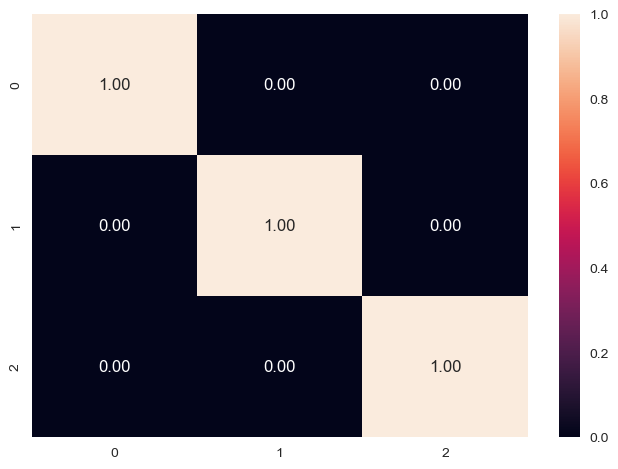

In [52]:
sns.heatmap(df_pca.corr(),fmt='.2f',annot=True);

In [53]:
df_new=df_pca.join(df_labels)
df_new.head()

,0,1,2,labels
0,-6.895508,-1.046780,1.567578,1
1,3.330946,0.109425,-1.052321,0
2,3.333831,-0.092919,-0.485267,0
3,2.032212,2.001352,-0.500231,0
4,-1.839840,-0.643680,-0.370169,1


In [66]:
df_new["labels"].value_counts(normalize=True)

1    0.521127
0    0.478873
Name: labels, dtype: float64

Data is blanced data

# Lets create random forest for reduced dim data set.

In [54]:
X=df_new.drop(["labels"],axis=1)
y=df_new["labels"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
X_train.head()

,0,1,2
41,1.120379,2.659761,-0.440054
38,-6.224432,0.481367,-0.731067
348,0.077989,1.508353,-0.519736
158,-6.896844,-1.006921,1.758411
275,3.505443,-1.144048,1.587696


In [55]:
RF=RandomForestClassifier(random_state=1).fit(X_train,y_train)

In [56]:
y_pred_rf=RF.predict(X_test)

In [57]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        52

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107



In [58]:
confusion_matrix(y_test,y_pred_rf)

array([[55,  0],
       [ 0, 52]], dtype=int64)

In [59]:
cohen_kappa_score(y_pred_rf,y_test)

1.0